In [1]:
# -*- coding: utf-8 -*-
"""
Created on Mon Nov  4 07:02:45 2024

@author: robberto
"""

from astropy.io import fits
import matplotlib.pyplot as plt

import os
import shutil
import glob
import numpy as np
import pandas as pd
import copy
import heapq

from scipy.signal import find_peaks
import cv2

## """ Instantiate the class with the correct directory name"""

In [3]:
data_path = "/Users/robberto/Library/CloudStorage/Box-Box/My Documents - Massimo Robberto/@Massimo/_Science/2. Projects_HW/SAMOS/SAMOS_DATA/RUN2/SAMI"
from Class_SAMOS import SAMOS
SAMOS = SAMOS(data_path) 

working on the directory: /Users/robberto/Library/CloudStorage/Box-Box/My Documents - Massimo Robberto/@Massimo/_Science/2. Projects_HW/SAMOS/SAMOS_DATA/RUN2/SAMI


### Check the files you want to process here
https://www.stsci.edu/~robberto/Main/SAMOS/Run_October2024/SAMI/QL_20241017/overview.html

## SELECT A TARGET AND INSPECT THE FILES YOU MAY WANT TO USE. ANNOTATE BELOW

In [6]:
# DATA ANALYSIS 
target_name = "ABELL3120"
target_mode  = "SAMI_manual_Mask_T00_Low_Red"

"""
=> Night 20241017
TARGET = target.025.fits [600s], target.026.fits [600s], target.027.fits [600s]
FLATS  = target.028.fits [2s], calibration.029.fits [2s]
ARC_Ne = calibration.033.fits [10s]
ARC_HgAr = calibration.030.fits [8s]
ARC_HgArNe = calibration.031.fits   [10s], calibration.032.fits [8s]  
ARC_Ne_DMDoff = calibration.034.fits [8s]
ARC_HgAr_DMDoff = calibration.036.fits [8s]
ARC_HgArNe_DMDoff = calibration.035.fits [8s]

=> Night 20241016
BIAS =  bias.055.fits - bias.074.fits 

=> Night 20241016
FLATS_DMDoff = flat019.fits [0.1s]; flat.020.fits[1s]
"""

'\n=> Night 20241017\nTARGET = target.025.fits [600s], target.026.fits [600s], target.027.fits [600s]\nFLATS  = target.028.fits [2s], calibration.029.fits [2s]\nARC_Ne = calibration.033.fits [10s]\nARC_HgAr = calibration.030.fits [8s]\nARC_HgArNe = calibration.031.fits   [10s], calibration.032.fits [8s]  \nARC_Ne_DMDoff = calibration.034.fits [8s]\nARC_HgAr_DMDoff = calibration.036.fits [8s]\nARC_HgArNe_DMDoff = calibration.035.fits [8s]\n\n=> Night 20241016\nBIAS =  bias.055.fits - bias.074.fits \n\n=> Night 20241016\nFLATS_DMDoff = flat019.fits [0.1s]; flat.020.fits[1s]\n'

In [7]:
#CREATE A WORKING DIRECTORY WITH THE TARGET NAME IF IT DOES NOT EXIST
analysis_top_directory ="/Users/robberto/Library/CloudStorage/Box-Box/My Documents - Massimo Robberto/@Massimo/_Science/2. Projects_HW/SAMOS/SAMOS_DATA_ANALYSIS"
working_directory = os.path.join(analysis_top_directory,target_name,target_mode)

# if the folder already exists in new directory
if not os.path.exists(working_directory):
        os.makedirs(working_directory)
os.chdir(working_directory) 
print(working_directory)

#DATA DIRECTORIES WHERE THE SAMOS FILES ARE STORED
data_directory = "/Users/robberto/Library/CloudStorage/Box-Box/My Documents - Massimo Robberto/@Massimo/_Science/2. Projects_HW/SAMOS/SAMOS_DATA/RUN2/SAMI"
data_directory_17 = data_directory + "/20241017"
data_directory_16 = data_directory + "/20241016"
data_directory_09 = data_directory + "/20241009"

/Users/robberto/Library/CloudStorage/Box-Box/My Documents - Massimo Robberto/@Massimo/_Science/2. Projects_HW/SAMOS/SAMOS_DATA_ANALYSIS/ABELL3120/SAMI_manual_Mask_T00_Low_Red


## READ THE TARGET SPECTRA

#FIRST STEP: READ AND MOVE THE FILES
File_type = "TARGET"
File_NR = '027'
file  = os.path.join(data_directory_17,'target.'+File_NR+'.fits')
print(file)

hdu = SAMOS.read_SAMI_mosaic(file)
Target_Spectra = hdu.data
hdu.data = Target_Spectra

#make a copy of the invoice to work with
destination=File_type+'.fits'
shutil.copy(file,destination)
#hdul = fits.HDUList([hdu]) ; hdul.writeto(destination,overwrite=True)

In [11]:
i_slit = 10 #make sure this has been set also above
#READ THE FITS FILE
#====================================================================================
fits_file = working_directory+'/spec_{i_s:03.0f}.fits'.format(i_s=i_slit)
    
hdul = fits.open(fits_file)
hdr = hdul[0].header
hdul.info()
print(hdr)
slits= [hdr['i0'], hdr['i1'], hdr['i2'], hdr['i3']]
print(slits)
data1 = hdul[1].data
i_flat = hdul[2].data
lines = hdul[3].data
mask_in = hdul[4].data
coefficients = hdul[5].data
curvature = hdul[6].data
spec_2d = hdul[7].data  
spec_1d = hdul[8].data
dx = data1.shape[1] ; print(dx)
dy = data1.shape[0] ; print(dy)

mask_out = 1-mask_in

Filename: /Users/robberto/Library/CloudStorage/Box-Box/My Documents - Massimo Robberto/@Massimo/_Science/2. Projects_HW/SAMOS/SAMOS_DATA_ANALYSIS/ABELL3120/SAMI_manual_Mask_T00_Low_Red/spec_010.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       9   ()      
  1  DATA          1 ImageHDU         8   (4094, 42)   float64   
  2  FLAT          1 ImageHDU         8   (4094, 42)   float64   
  3  LINES         1 ImageHDU         8   (4094, 42)   float64   
  4  MASK          1 ImageHDU         8   (4094, 42)   float64   
  5  COEFFS        1 ImageHDU         7   (4,)   float64   
  6  CURVATURE     1 ImageHDU         8   (4094, 2)   float64   
  7  SPEC-2D       1 ImageHDU         8   (4094, 42)   float64   
  8  SPEC-1D       1 ImageHDU         8   (4094, 2)   float64   
SIMPLE  =                    T / conforms to FITS standard                      BITPIX  =                    8 / array data type                                NAXIS   

### LINE CALIBRATION - TO RUN SET i_slit = 10 above (randomly selected...)

In [13]:
curvature


array([[0.00000000e+00, 1.00000000e+00, 2.00000000e+00, ...,
        4.09100000e+03, 4.09200000e+03, 4.09300000e+03],
       [2.11318991e+01, 2.11301518e+01, 2.11284053e+01, ...,
        2.26474194e+01, 2.26503191e+01, 2.26532203e+01]], dtype='>f8')

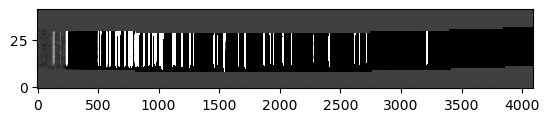

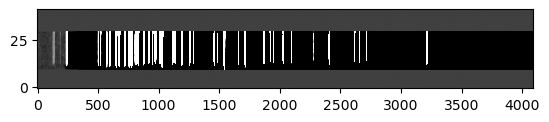

[findpeaks] >Finding peaks in 1d-vector using [peakdetect] method..
         x             y   labx  valley  peak
242    242   1127.000000   43.0   False  True
246    246   1125.738095   44.0   False  True
504    504    576.095238   92.0   False  True
509    509    477.452381   93.0   False  True
522    522    827.095238   95.0   False  True
527    527    620.190476   96.0   False  True
576    576   7592.904762  103.0   False  True
600    600   8074.190476  106.0   False  True
649    649    326.619048  112.0   False  True
654    654  19820.309524  113.0   False  True
680    680   5413.214286  116.0   False  True
725    725   6771.904762  122.0   False  True
762    762  19535.404762  126.0   False  True
779    779  24495.571429  127.0   False  True
808    808    522.452381  129.0   False  True
818    818  22190.071429  130.0   False  True
836    836  17859.238095  131.0   False  True
880    880  17050.142857  136.0   False  True
920    920  22937.785714  142.0   False  True
953    953  

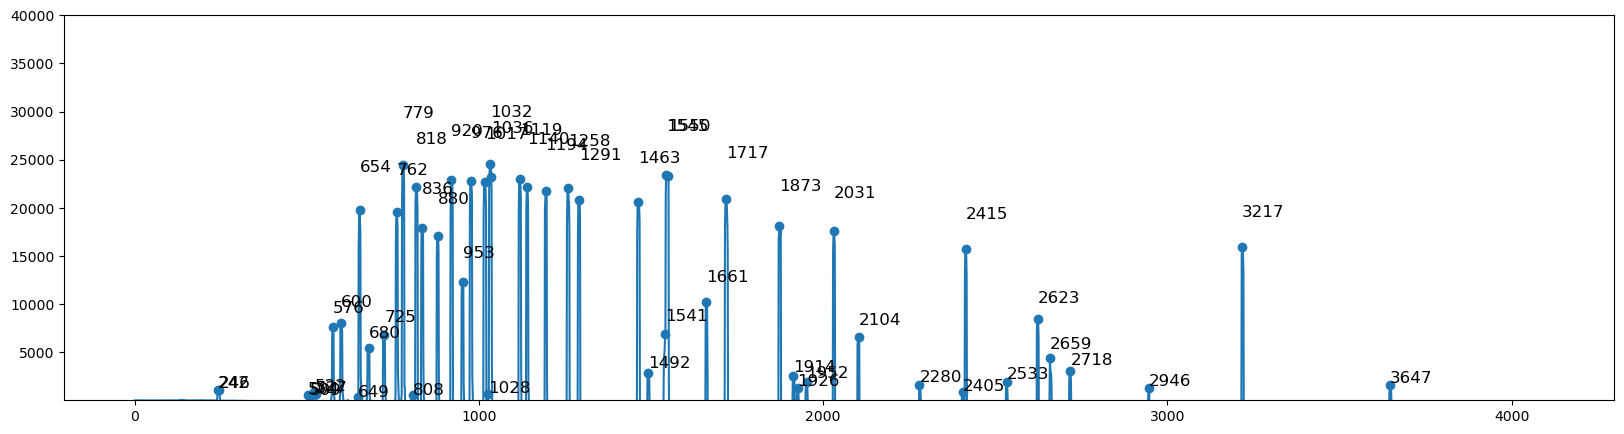

In [14]:
arc_good_slit  = lines * mask_in
arc_good_bck = lines * mask_out
plt.imshow(arc_good_slit, origin='lower', cmap='gray',vmin=-50, vmax=150,aspect='15.5') 
plt.show()

p = curvature

#print(np.array(p[1,5]))

arc_good_rect = arc_good_slit * 0
for i in range(dx):
    arc_good_rect[:,i] = np.roll(arc_good_slit[:,i],-int(np.array(p[1,i]))+20)
plt.imshow(arc_good_rect,origin='lower', cmap='gray',vmin=-50, vmax=150,aspect='15.5') 
plt.show()

#fig, ax = plt.subplots()
plt.figure(figsize=(20,5))
#plt.yscale('log')
plt.ylim([10,4e4])
plt.plot(arc_good_rect.mean(axis=0))


#find the lines
#from scipy.signal import find_peaks 
import findpeaks
fp = findpeaks.findpeaks(lookahead=1)
#results = fp.fit(vector)
lines_df = fp.fit(arc_good_rect.mean(axis=0))
lines= lines_df['df'][ (lines_df['df']['peak'] == True)] 
lll = lines[lines['y'] > 100 ]
print(lll)
lll_np=lll.to_numpy()
xxx = lll.x.to_numpy()
yyy = lll.y.to_numpy()
#v_slit_up=np.delete(v_slit_up, 16, axis=0)
#print(lll_np[:,1], len(lll_np[:,1]))
#print(lines)

#ax = fig.add_subplot(1, 1, 1)
plt.scatter(xxx,yyy)
for i in range(len(xxx)):
    plt.text(xxx[i], yyy[i]*1.2, str(xxx[i]), fontsize = 12)
plt.show()




Linear Fit Coefficients: [-3.42112992e-09  3.33866458e-05  1.15692655e+00  5.17571941e+03]
8786.313181889056


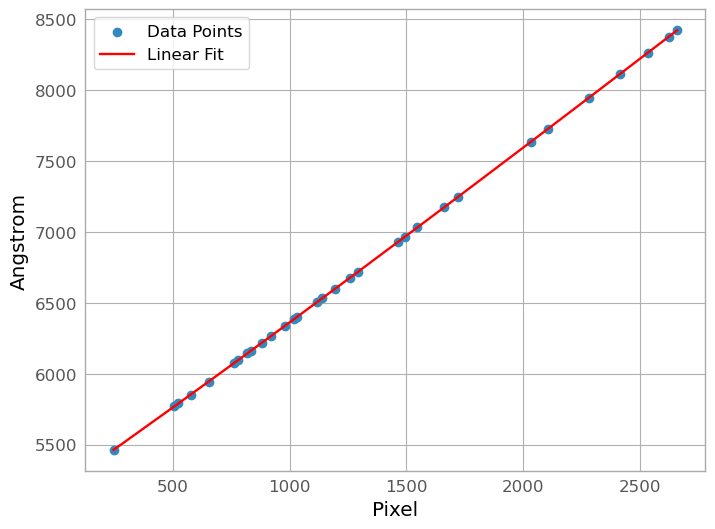

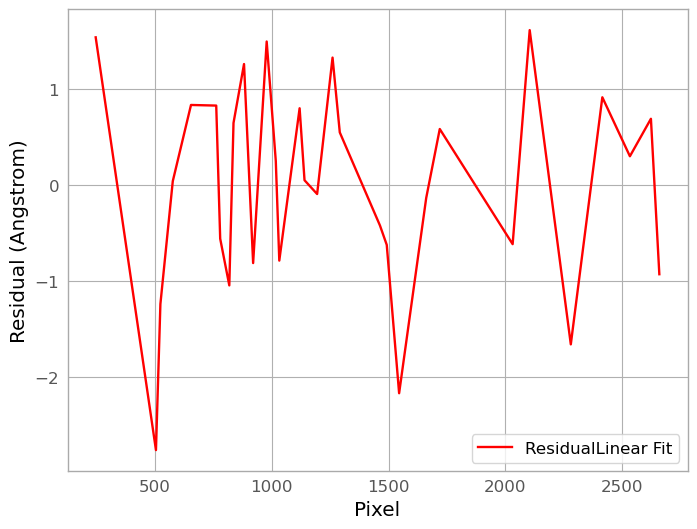

Linear Fit Coefficients: [ 1.75030123e-09 -4.63856187e-05  1.20194102e+00 -5.22049803e+03]
920.2470244159786


In [44]:
#HgArNe_pix = [1119, 1140, 1194, 1258, 1291, 1463, 1492, 1545, 2031, 2104, 2280, 2405, 2533,2623, 2659]#,2719]
#HgArNe_lam = [6506, 6532, 6508, 6532, 6717, 6929, 6963, 7032, 7635, 7724, 7948, 8103, 8264,8377, 8424]#,8424]
HgArNe_pix = [246,  504, 523,   576,  654,  762,  779,  818,  836,  881,  920,  
              978, 1017, 1032, 1119, 1140, 1194, 1260, 1291, 1463, 1492, 1545, 1661, 1719, 2031, 2104, 2280, 2415, 2533,2623, 2659]#,2719]
HgArNe_lam = [5460.7500,
              5769.6100,
              5790.6700, 
              5852.4879, 
              5944.8342, 
              6074.3377, 
              6096.1631, 
              6143.5939, 
              6163.5939, 
              6217.2812, 
              6266.4950,
              
              6334.4278, 
              6382.9917, 
              6402.2480, 
              6506.5281, 
              6532.8822, 
              6598.9529, 
              6678.2762, 
              6717.0430, 
              6929.4673,
              
              6965.4310, 
              7032.4131, 
              7173.9381,
              7245.1666, #24-1719
              7635.1060, #25-2031
              7724.2070, #26-2104 [Ar]
              7948.1760, #27-2280 [Ar]
              8115.3110, #28-2415 [Ar]
              8264.5220, #29-2533 [Ar]
              8377.6080, 
              8424.6480  #31-2659 [Ar]
                ]
plt.scatter(HgArNe_pix,HgArNe_lam, label='Data Points')

coefficients = np.polyfit(HgArNe_pix,HgArNe_lam, 3)
print("Linear Fit Coefficients:", coefficients)

# Create polynomial function
p = np.poly1d(coefficients)

#fishing for the lines we have used...
print(p(2946))

plt.plot(HgArNe_pix, p(HgArNe_pix), label='Linear Fit', color='red')
plt.xlabel("Pixel")
plt.ylabel("Angstrom")
plt.legend()
plt.show()

plt.plot(HgArNe_pix, p(HgArNe_pix)-HgArNe_lam, label='ResidualLinear Fit', color='red')
plt.xlabel("Pixel")
plt.ylabel("Residual (Angstrom)")
plt.legend()
plt.show()

#CREATE INVERSE POLYNOMIAL
coefficients_wl2pix = np.polyfit(HgArNe_lam,HgArNe_pix, 3)
print("Linear Fit Coefficients:", coefficients_wl2pix)

# Create polynomial function
p_wl2pix = np.poly1d(coefficients_wl2pix)
print(p_wl2pix(6266))

## Parenthesis to save and reload the polynomial coeefficients

print(coefficients,p)
print(working_directory)
np.savetxt(working_directory+'/wl_poly_coefficients.txt', coefficients)
np.savetxt(working_directory+'/wl_poly_coefficients_wl2pix.txt', coefficients_wl2pix)
#check
coefficients_in = np.loadtxt(working_directory+'/wl_poly_coefficients.txt', dtype=float)
print(coefficients_in)
coefficients ==  coefficients_in
p(2000)



[findpeaks] >Finding peaks in 1d-vector using [peakdetect] method..
         x             y   labx  valley  peak
242    242   1127.000000   43.0   False  True
246    246   1125.738095   44.0   False  True
504    504    576.095238   92.0   False  True
509    509    477.452381   93.0   False  True
522    522    827.095238   95.0   False  True
527    527    620.190476   96.0   False  True
576    576   7592.904762  103.0   False  True
600    600   8074.190476  106.0   False  True
649    649    326.619048  112.0   False  True
654    654  19820.309524  113.0   False  True
680    680   5413.214286  116.0   False  True
725    725   6771.904762  122.0   False  True
762    762  19535.404762  126.0   False  True
779    779  24495.571429  127.0   False  True
808    808    522.452381  129.0   False  True
818    818  22190.071429  130.0   False  True
836    836  17859.238095  131.0   False  True
880    880  17050.142857  136.0   False  True
920    920  22937.785714  142.0   False  True
953    953  

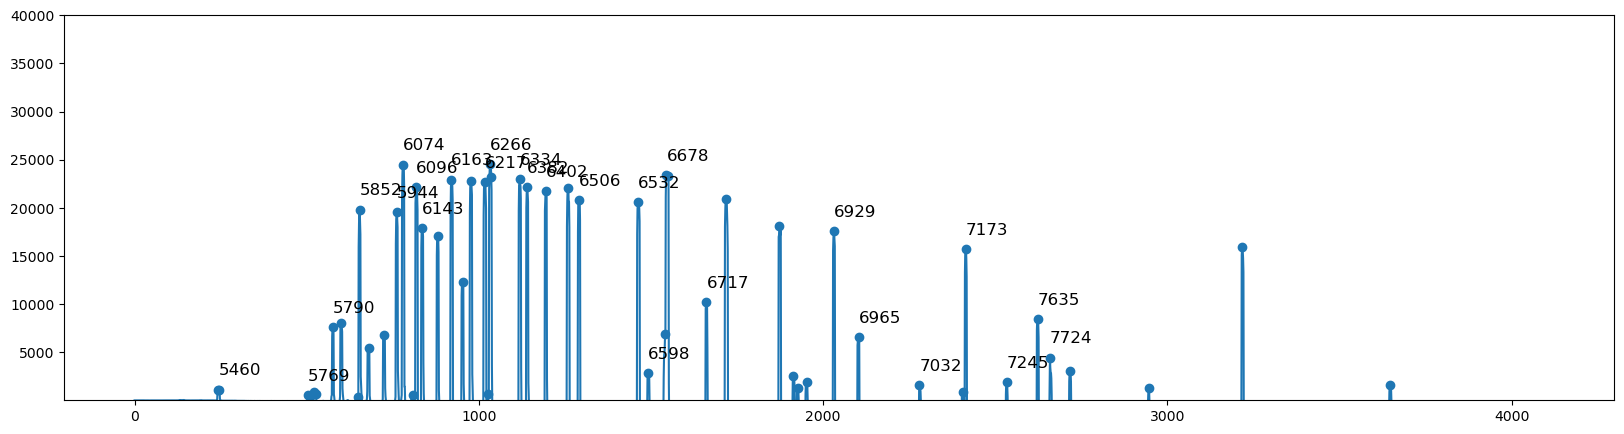

In [18]:
plt.figure(figsize=(20,5))
#plt.yscale('log')
plt.ylim([10,4e4])
plt.plot(arc_good_rect.mean(axis=0))


#find the lines
from scipy.signal import find_peaks 
import findpeaks
fp = findpeaks.findpeaks(lookahead=1)
#results = fp.fit(vector)
lines_df = fp.fit(arc_good_rect.mean(axis=0))
lines= lines_df['df'][ (lines_df['df']['peak'] == True)] 
lll = lines[lines['y'] > 100 ]
xxx = lll.x.to_numpy()
yyy = lll.y.to_numpy()
print(lll)
#lll_np=lll.to_numpy()
#v_slit_up=np.delete(v_slit_up, 16, axis=0)
#print(lll_np[:,1], len(lll_np[:,1]))
#print(lines)
#ax = fig.add_subplot(1, 1, 1)
plt.scatter(xxx,yyy)

counter=0
for i in HgArNe_pix:
    print(i)
    z = lll.y[lll.x == i]
    print(z,len(z))
    if len(z) != 0:
        z1=z.to_numpy()[0]
        plt.text(int(i), np.squeeze(z1)+1.5E3, str(int(HgArNe_lam[counter])), fontsize = 12)
        counter+=1
plt.show()

## FINALLY REDUCED SPECTRUM


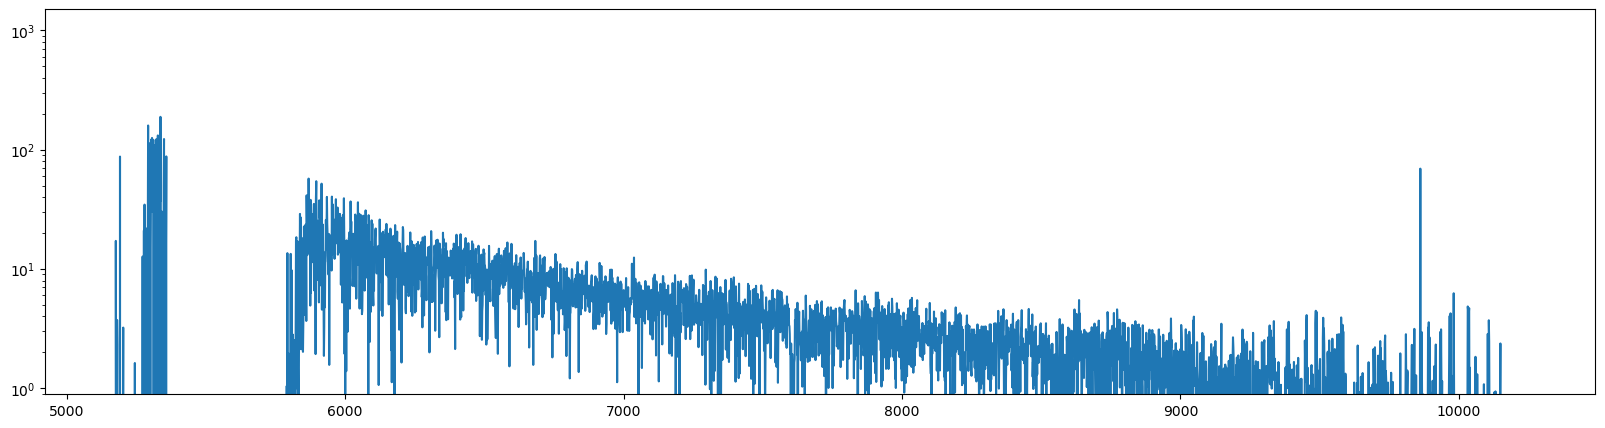

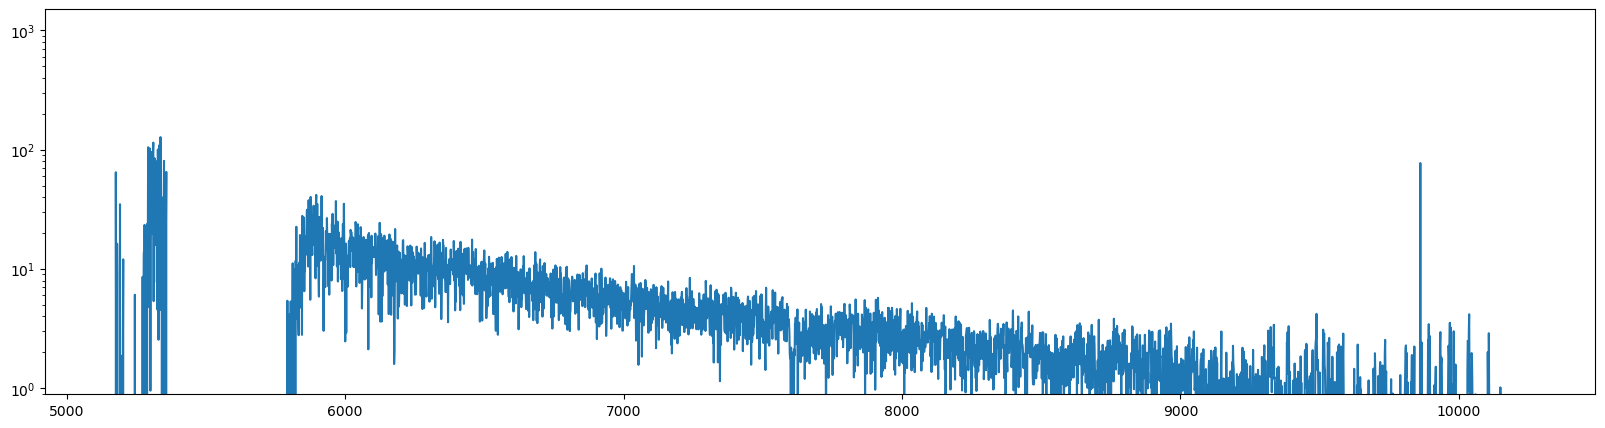

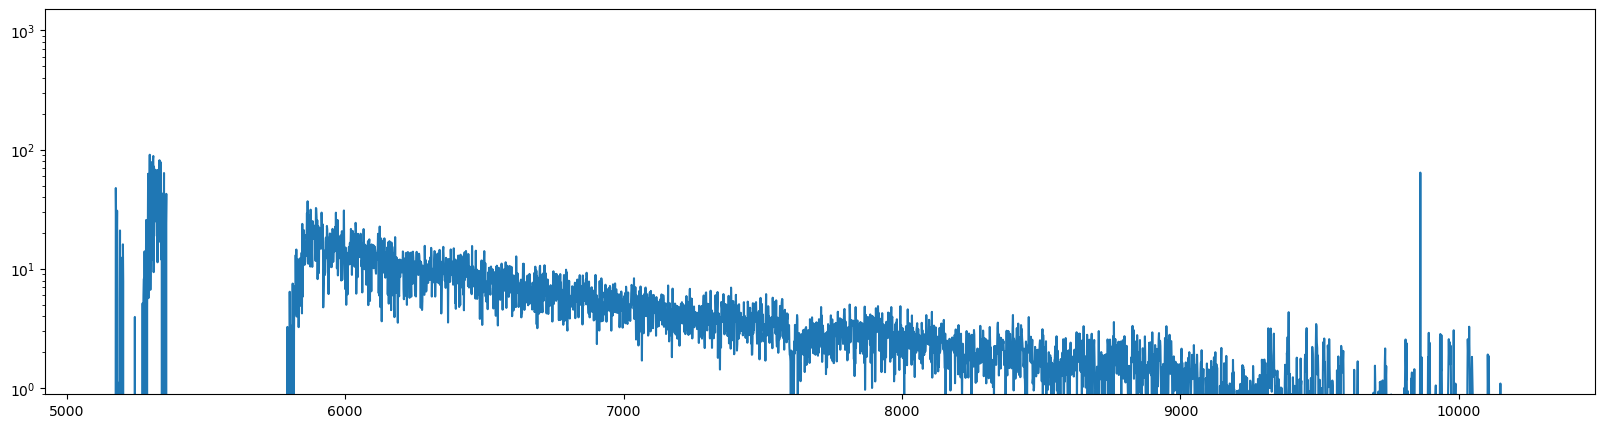

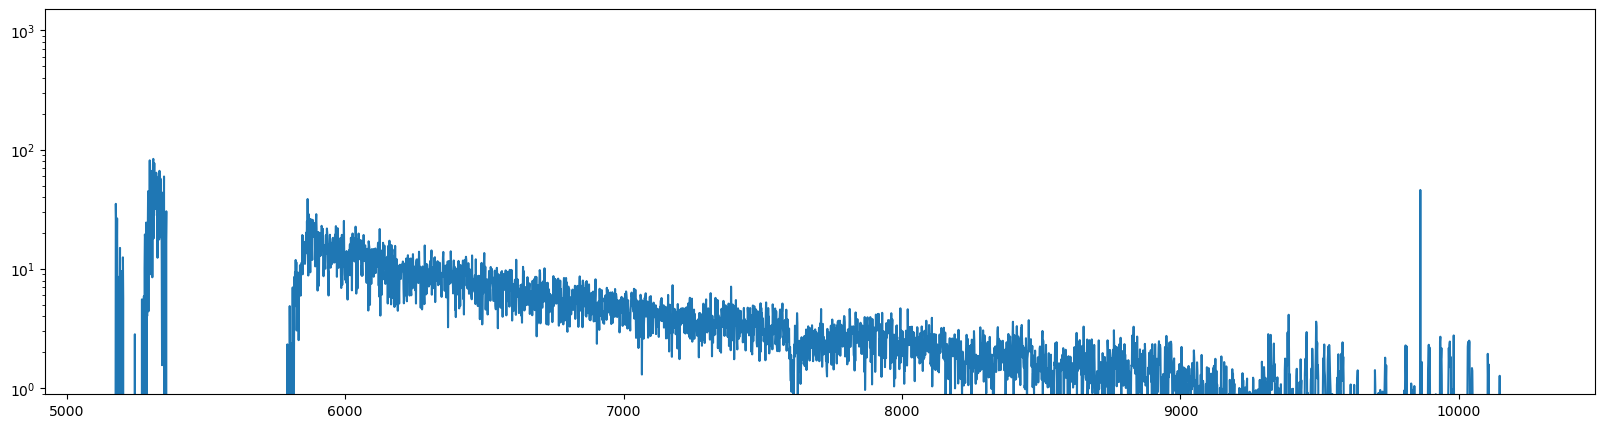

In [19]:
x=np.arange(dx)
wl = p(x)
xc = 20#(slits[i][2]+slits[i][1])/2.
#spectrum_1d = spectra_slit_ff_rect_OH[17:25,:].mean(axis=0)
for dist in range(4):
    plt.figure(figsize=(20,5))
    plt.yscale('log')
    plt.ylim([0,1500])
    spectrum_1d = spec_2d[22-dist:23+dist,:].mean(axis=0)
    plt.plot(wl,spectrum_1d) 
    plt.show()



## UPDATE THE FITS DATACUBE

In [21]:
#====================================================================================
fits_file = working_directory+'/spec_{i_s:03.0f}.fits'.format(i_s=i_slit)
hdulist = fits.open(fits_file)

#add wl 
obj = hdulist.pop('SPEC-1D')
spec1d = [wl,spectrum_1d]
final1d_hdu = fits.ImageHDU(data=spec1d, name= "SPEC-1d")
hdulist.append(final1d_hdu)

    
hdulist.info()
hdulist.writeto(working_directory+'/spec_{i_s:03.0f}.fits'.format(i_s=i_slit),overwrite=True)
hdulist.close()
    

Filename: /Users/robberto/Library/CloudStorage/Box-Box/My Documents - Massimo Robberto/@Massimo/_Science/2. Projects_HW/SAMOS/SAMOS_DATA_ANALYSIS/ABELL3120/SAMI_manual_Mask_T00_Low_Red/spec_010.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       9   ()      
  1  DATA          1 ImageHDU         8   (4094, 42)   float64   
  2  FLAT          1 ImageHDU         8   (4094, 42)   float64   
  3  LINES         1 ImageHDU         8   (4094, 42)   float64   
  4  MASK          1 ImageHDU         8   (4094, 42)   float64   
  5  COEFFS        1 ImageHDU         7   (4,)   float64   
  6  CURVATURE     1 ImageHDU         8   (4094, 2)   float64   
  7  SPEC-2D       1 ImageHDU         8   (4094, 42)   float64   
  8  SPEC-1D       1 ImageHDU         8   (4094, 2)   float64   


# Plot using SPECUTILS

https://specutils.readthedocs.io/en/stable/spectrum1d.html

3906
[5800.13843909 5801.32801217 5802.51764108 ... 9996.38949139 9997.65068102
 9998.91185728] Angstrom
[5800.13843909 5801.32801217 5802.51764108 ... 9996.38949139 9997.65068102
 9998.91185728] Angstrom


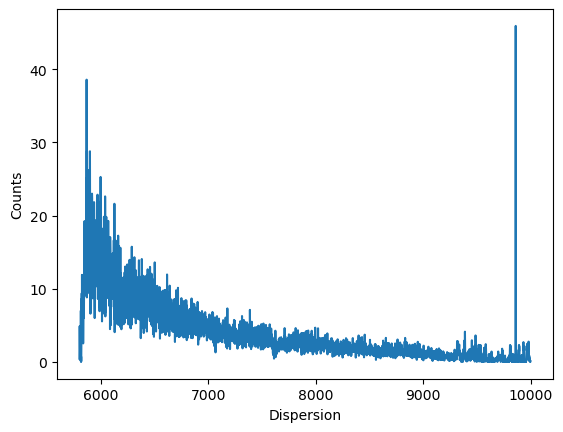

In [23]:
import astropy.units as u
from specutils import Spectrum1D

flux = spectrum_1d * u.adu
wavelength = wl * u.AA
#imin = np.where(a.find(a>2)
diff_0 = abs(wavelength-5800*u.AA)                
i_0 = np.where(diff_0 == min(diff_0))[0][0]
diff_1 = abs(wavelength-10000*u.AA)                
i_1 = np.where(diff_1 == min(diff_1))[0][0]
print(i_1)
print(wavelength[i_0:i_1])
#wavelength_band = np.arange(wavelength, 10000) * u.AA
spec1d = Spectrum1D(spectral_axis=wavelength[i_0:i_1], flux=flux[i_0:i_1])
ax = plt.subplots()[1]  
ax.plot(spec1d.spectral_axis, spec1d.flux)  
ax.set_xlabel("Dispersion")  
ax.set_ylabel("Counts")  

# Write the 1d file
print(spec1d.spectral_axis)
#to write
spec1d.write(working_directory+'/spec1d_{i_slit:03.0f}.fits'.format(i_slit=i_slit),overwrite=True)  
#to read
spec1d = Spectrum1D.read(working_directory+'/spec1d_{i_slit:03.0f}.fits'.format(i_slit=i_slit))  

# Write the 2d file
hdul = fits.open(fits_file)
spec_2d_data = hdul[7].data  
spec2d = Spectrum1D(spectral_axis=wavelength[i_0:i_1],
                    flux = spec_2d_data[:,i_0:i_1]*u.adu)
hdul.close
spec2d.write(working_directory+'/spec2d_{i_slit:03.0f}.fits'.format(i_slit=i_slit),overwrite=True)  




## APPENDIX: BUILDING THE P-FLATS

Pixel flats are obtained when two flats of different brightness (e.g. exposure time) are bias subtracted and then divided; 
after division by the ration of the exposure times, the image should be around 1 average, with salt-pepper noise indicative of the relative response of the pixels. To be repeated multiple times to beat down the readnoise.

We run thi experiment on the first night, and the format of the image was later changed so these are not useful for processing data taken later.

/Users/robberto/Library/CloudStorage/Box-Box/My Documents - Massimo Robberto/@Massimo/_Science/2. Projects_HW/SAMOS/SAMOS_DATA/RUN2/SAMI/20241009/flat.019.fits
/Users/robberto/Library/CloudStorage/Box-Box/My Documents - Massimo Robberto/@Massimo/_Science/2. Projects_HW/SAMOS/SAMOS_DATA/RUN2/SAMI/20241009/flat.020.fits
/Users/robberto/Library/CloudStorage/Box-Box/My Documents - Massimo Robberto/@Massimo/_Science/2. Projects_HW/SAMOS/SAMOS_DATA/RUN2/SAMI/20241009/flat.041.fits
(1284, 4094)


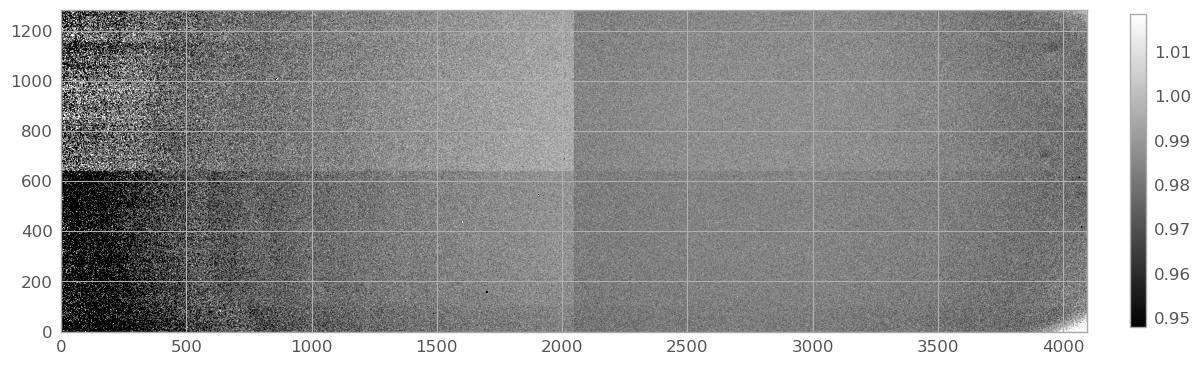

In [25]:
#FIRST STEP: READ AND MOVE THE FILES
File_type = "FLAT QUARTZ"
File_NR = '019'
file_01  = os.path.join(data_directory_09,'flat.'+File_NR+'.fits')
print(file_01)

File_NR = '020'
file_10  = os.path.join(data_directory_09,'flat.'+File_NR+'.fits')
print(file_10)

File_type = "FLAT QUARTZ"
File_NR = '041'
file_bias  = os.path.join(data_directory_09,'flat.'+File_NR+'.fits')
print(file_bias)


#SECOND STEP: READ AND AVERAGE
hdu = SAMOS.read_SAMI_mosaic(file_01)
flat_01_data = hdu.data
hdu.data = flat_01_data

hdu1 = SAMOS.read_SAMI_mosaic(file_10)
flat_10_data = hdu1.data
hdu1.data = flat_10_data

hdu1 = SAMOS.read_SAMI_mosaic(file_bias)
bias_data = hdu1.data
hdu1.data = bias_data

flat_01_data_bias = flat_01_data - bias_data
flat_10_data_bias = flat_10_data - bias_data
flat = np.divide(flat_10_data_bias,flat_01_data_bias,out=np.full_like(flat_10_data_bias, 10), where=flat_01_data_bias!=0 )/10.
print(flat.shape)

#DISPLAY
image = flat
median = np.median(flat)
stddev = np.std(flat)
z0 = median-stddev
z1 = median+stddev

SAMOS.display_image(flat,zmin=z0,zmax=z1)